# Laboratory Exercise 2 - Randy Geszvain

In [99]:
!pip install fbprophet

In [0]:
import timeit
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


import plotly
plotly.tools.set_credentials_file(username='ygeszvain', api_key='OyNA6ynxiLYhCh4JiuQF')

# Data Scource and Clean Up

In [101]:
# OBTAIN -  retrieve the data from Zillow

df = pd.read_csv('https://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv', sep=',', error_bad_lines=False, encoding = "ISO-8859-1")
df.head(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,337200.0,338200.0,339000.0,339700.0,340400.0,341000.0,341600.0,342300.0,343400.0,344900.0,346200.0,347000.0,347900.0,349100.0,350400.0,352000.0,353800.0,356100.0,358700.0,361600.0,365400.0,370000.0,374400.0,378700.0,383300.0,388100.0,393100.0,398300.0,403600.0,409000.0,414500.0,420000.0,426100.0,...,952800,959300,966100,968600,971300,972400,970200,971800,978400,986200,993700,998300,997100,994300,991300,987900,989500,997900,1005100,1008300,1009600,1012200,1016500,1022600,1029000,1034500,1036700,1036600,1038800,1040900,1041900,1044100,1047700,1049600,1048500,1048500,1052700,1057800,1067100,1076100
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,...,327400,326900,327300,328900,329900,329800,328700,327400,326400,325500,324800,324800,323800,322200,320900,320400,320200,320700,320700,320100,319900,320400,320900,321100,322800,326600,330400,332600,334400,335700,336800,338100,338500,337200,336200,336100,335300,334000,333400,333200
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,502900.0,504900.0,506300.0,507200.0,507400.0,507000.0,506100.0,504700.0,503700.0,503200.0,501900.0,499500.0,497500.0,495900.0,494800.0,494400.0,494800.0,496000.0,498400.0,501900.0,507600.0,514700.0,522100.0,529400.0,537900.0,547000.0,556500.0,566100.0,575700.0,584800.0,593500.0,601600.0,610100.0,...,1230200,1234900,1240100,1243300,1244100,1244400,1243400,1243400,1245500,1251600,1259900,1266900,1271800,1275900,1279000,1280800,1284100,1288000,1290100,1289300,1290400,1295700,1301700,1304500,1309700,1314900,1317300,1319400,1322700,1321600,1320100,1320200,1319100,1318200,1319600,1322700,1328100,1334600,1340900,1342900
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,96800.0,96700.0,96600.0,96400.0,96200.0,96100.0,96200.0,96300.0,96600.0,97000.0,97500.0,98000.0,98400.0,98800.0,99200.0,99500.0,99700.0,100000.0,100200.0,100400.0,100700.0,101100.0,101800.0,102900.0,104300.0,106200.0,...,156000,157700,159400,161600,164100,166100,167400,168200,168500,168600,168600,168500,168200,167700,167200,166900,166900,166800,166800,167400,168400,169700,170900,172200,173400,174300,175200,176300,176800,176900,177400,178100,178700,179600,180300,180900,181900,183200,182900,181500
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,...,116100,115600,115000,114600,114200,114100,114100,113900,114100,114800,115700,116200,116800,117300,117700,118100,118700,119000,119200,119500,119900,120300,120300,120200,120200,120400,120600,121200,122200,123000,123700,124600,125700,126400,126800,127500,128100,128600,128800,128800


In [102]:
# review null values in df

df.apply(lambda x: sum(x.isnull()),axis=0)

RegionID         0
RegionName       0
City             0
State            0
Metro         1327
CountyName       0
SizeRank         0
1996-04       1193
1996-05       1193
1996-06       1193
1996-07       1193
1996-08       1193
1996-09       1193
1996-10       1193
1996-11       1193
1996-12       1193
1997-01       1193
1997-02       1193
1997-03       1193
1997-04       1193
1997-05       1193
1997-06       1193
1997-07       1192
1997-08       1192
1997-09       1192
1997-10       1192
1997-11       1192
1997-12       1192
1998-01       1190
1998-02       1190
              ... 
2016-11          0
2016-12          0
2017-01          0
2017-02          0
2017-03          0
2017-04          0
2017-05          0
2017-06          0
2017-07          0
2017-08          0
2017-09          0
2017-10          0
2017-11          0
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
2018-05          0
2018-06          0
2018-07          0
2018-08     

In [103]:
# create a dictionary to match region ID and metro area
dic = df[['RegionID','Metro']]
dic = dic[pd.notnull(dic['Metro'])]
dic.head()

,RegionID,Metro
0,84654,Chicago-Naperville-Elgin
1,91982,Houston-The Woodlands-Sugar Land
2,84616,Chicago-Naperville-Elgin
3,91940,Houston-The Woodlands-Sugar Land
4,93144,El Paso


In [104]:
# review null values in dic

dic.apply(lambda x: sum(x.isnull()),axis=0)

RegionID    0
Metro       0
dtype: int64

In [105]:
# create a dictionary
metro_dic = {}
dic_RegionID = dic['RegionID'].values
print(len(dic_RegionID))

dic_Metro = dic['Metro'].values
print(len(dic_Metro))

for elm in dic_RegionID:
    for el in dic_Metro:
            metro_dic[elm] = el

print(len(metro_dic))    

14122
14122
14122


In [0]:
# match up the strings
df['Metro'] = df['RegionID'].map(metro_dic)

In [107]:
# review null values in df adter matching

df.apply(lambda x: sum(x.isnull()),axis=0)

RegionID         0
RegionName       0
City             0
State            0
Metro         1327
CountyName       0
SizeRank         0
1996-04       1193
1996-05       1193
1996-06       1193
1996-07       1193
1996-08       1193
1996-09       1193
1996-10       1193
1996-11       1193
1996-12       1193
1997-01       1193
1997-02       1193
1997-03       1193
1997-04       1193
1997-05       1193
1997-06       1193
1997-07       1192
1997-08       1192
1997-09       1192
1997-10       1192
1997-11       1192
1997-12       1192
1998-01       1190
1998-02       1190
              ... 
2016-11          0
2016-12          0
2017-01          0
2017-02          0
2017-03          0
2017-04          0
2017-05          0
2017-06          0
2017-07          0
2017-08          0
2017-09          0
2017-10          0
2017-11          0
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
2018-05          0
2018-06          0
2018-07          0
2018-08     

In [0]:
# Drop all nan
data = df.dropna()

In [109]:
data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
0,84654,60657,Chicago,IL,Las Vegas-Henderson-Paradise,Cook County,1,337200.0,338200.0,339000.0,339700.0,340400.0,341000.0,341600.0,342300.0,343400.0,344900.0,346200.0,347000.0,347900.0,349100.0,350400.0,352000.0,353800.0,356100.0,358700.0,361600.0,365400.0,370000.0,374400.0,378700.0,383300.0,388100.0,393100.0,398300.0,403600.0,409000.0,414500.0,420000.0,426100.0,...,952800,959300,966100,968600,971300,972400,970200,971800,978400,986200,993700,998300,997100,994300,991300,987900,989500,997900,1005100,1008300,1009600,1012200,1016500,1022600,1029000,1034500,1036700,1036600,1038800,1040900,1041900,1044100,1047700,1049600,1048500,1048500,1052700,1057800,1067100,1076100
1,91982,77494,Katy,TX,Las Vegas-Henderson-Paradise,Harris County,2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,...,327400,326900,327300,328900,329900,329800,328700,327400,326400,325500,324800,324800,323800,322200,320900,320400,320200,320700,320700,320100,319900,320400,320900,321100,322800,326600,330400,332600,334400,335700,336800,338100,338500,337200,336200,336100,335300,334000,333400,333200
2,84616,60614,Chicago,IL,Las Vegas-Henderson-Paradise,Cook County,3,502900.0,504900.0,506300.0,507200.0,507400.0,507000.0,506100.0,504700.0,503700.0,503200.0,501900.0,499500.0,497500.0,495900.0,494800.0,494400.0,494800.0,496000.0,498400.0,501900.0,507600.0,514700.0,522100.0,529400.0,537900.0,547000.0,556500.0,566100.0,575700.0,584800.0,593500.0,601600.0,610100.0,...,1230200,1234900,1240100,1243300,1244100,1244400,1243400,1243400,1245500,1251600,1259900,1266900,1271800,1275900,1279000,1280800,1284100,1288000,1290100,1289300,1290400,1295700,1301700,1304500,1309700,1314900,1317300,1319400,1322700,1321600,1320100,1320200,1319100,1318200,1319600,1322700,1328100,1334600,1340900,1342900
3,91940,77449,Katy,TX,Las Vegas-Henderson-Paradise,Harris County,4,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,96800.0,96700.0,96600.0,96400.0,96200.0,96100.0,96200.0,96300.0,96600.0,97000.0,97500.0,98000.0,98400.0,98800.0,99200.0,99500.0,99700.0,100000.0,100200.0,100400.0,100700.0,101100.0,101800.0,102900.0,104300.0,106200.0,...,156000,157700,159400,161600,164100,166100,167400,168200,168500,168600,168600,168500,168200,167700,167200,166900,166900,166800,166800,167400,168400,169700,170900,172200,173400,174300,175200,176300,176800,176900,177400,178100,178700,179600,180300,180900,181900,183200,182900,181500
4,93144,79936,El Paso,TX,Las Vegas-Henderson-Paradise,El Paso County,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,...,116100,115600,115000,114600,114200,114100,114100,113900,114100,114800,115700,116200,116800,117300,117700,118100,118700,119000,119200,119500,119900,120300,120300,120200,120200,120400,120600,121200,122200,123000,123700,124600,125700,126400,126800,127500,128100,128600,128800,128800


In [110]:
#review the data shape
data.shape

(13239, 284)

In [111]:
# review null values in data adter matching

data.apply(lambda x: sum(x.isnull()),axis=0)

RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
1996-04       0
1996-05       0
1996-06       0
1996-07       0
1996-08       0
1996-09       0
1996-10       0
1996-11       0
1996-12       0
1997-01       0
1997-02       0
1997-03       0
1997-04       0
1997-05       0
1997-06       0
1997-07       0
1997-08       0
1997-09       0
1997-10       0
1997-11       0
1997-12       0
1998-01       0
1998-02       0
             ..
2016-11       0
2016-12       0
2017-01       0
2017-02       0
2017-03       0
2017-04       0
2017-05       0
2017-06       0
2017-07       0
2017-08       0
2017-09       0
2017-10       0
2017-11       0
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
2018-05       0
2018-06       0
2018-07       0
2018-08       0
2018-09       0
2018-10       0
2018-11       0
2018-12       0
2019-01       0
2019-02       0
2019-03       0
2019-04       0
Length: 284, dtype: int6

# Data Transformation

In [112]:
#convert data types to strings
data['RegionID'] = data.RegionID.astype(str)
data['RegionName'] = data.RegionName.astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [113]:
# review data type
data.dtypes

RegionID       object
RegionName     object
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
1997-05       float64
1997-06       float64
1997-07       float64
1997-08       float64
1997-09       float64
1997-10       float64
1997-11       float64
1997-12       float64
1998-01       float64
1998-02       float64
               ...   
2016-11         int64
2016-12         int64
2017-01         int64
2017-02         int64
2017-03         int64
2017-04         int64
2017-05         int64
2017-06         int64
2017-07         int64
2017-08         int64
2017-09         int64
2017-10         int64
2017-11         int64
2017-12         int64
2018-01   

In [114]:
# locate all rows for state AR
data[data['State'].str.contains("AR")] 

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
256,89528,72401,Jonesboro,AR,Las Vegas-Henderson-Paradise,Craighead County,257,51800.0,51900.0,52100.0,52200.0,52300.0,52500.0,52600.0,52700.0,52900.0,53000.0,53100.0,53200.0,53400.0,53500.0,53700.0,54000.0,54300.0,54700.0,55100.0,55700.0,56300.0,57000.0,57700.0,58400.0,59100.0,59700.0,60400.0,61000.0,61700.0,62300.0,63000.0,63800.0,64700.0,...,97600,97500,98500,100200,102100,104300,106700,108600,109400,109900,109800,109200,108600,108800,109100,109400,109300,109000,108700,108600,108800,109100,109500,109600,109800,110200,110900,111000,110600,109800,109500,109500,109500,110500,113500,116200,117000,117300,117100,116800
296,89249,71913,Hot Springs,AR,Las Vegas-Henderson-Paradise,Garland County,297,80900.0,80900.0,80800.0,80700.0,80600.0,80400.0,80200.0,79900.0,79600.0,79300.0,79100.0,78900.0,78900.0,79300.0,79900.0,80600.0,81500.0,82500.0,83400.0,84300.0,85300.0,86200.0,87100.0,87700.0,88300.0,88800.0,89100.0,89300.0,89300.0,89300.0,89100.0,88900.0,88700.0,...,138400,138900,139500,139900,140200,140400,140500,140700,141500,142300,142500,142700,143400,144000,143900,143800,144400,145300,145700,145700,146400,147300,147800,146700,145300,145000,145400,145000,144600,145100,146200,146700,146600,146700,147300,148600,150000,150800,151100,151300
610,89319,72034,Conway,AR,Las Vegas-Henderson-Paradise,Faulkner County,611,75600.0,76100.0,76700.0,77300.0,78000.0,78800.0,79600.0,80500.0,81400.0,82400.0,83400.0,84400.0,85300.0,86100.0,86900.0,87600.0,88200.0,88700.0,89100.0,89500.0,89900.0,90400.0,90900.0,91400.0,91900.0,92300.0,92600.0,92800.0,93000.0,93200.0,93400.0,93500.0,93600.0,...,154700,155200,155600,156100,156900,157900,159300,160800,162300,163600,165200,166600,167800,169100,170300,171200,172000,173000,173300,172700,171600,170600,169500,169000,169000,169300,169500,169700,170300,171000,171400,171600,172300,173300,173800,173900,174400,175100,175200,174600
798,89707,72701,Fayetteville,AR,Las Vegas-Henderson-Paradise,Washington County,799,83100.0,83500.0,83700.0,83800.0,83700.0,83700.0,83700.0,83600.0,83600.0,83800.0,84400.0,85000.0,85500.0,85800.0,86000.0,86100.0,86100.0,86100.0,86100.0,86000.0,86000.0,86300.0,86800.0,87200.0,87400.0,87500.0,87400.0,87300.0,87200.0,87100.0,87300.0,87500.0,87800.0,...,175500,176900,178300,180300,182600,183900,184700,185700,187500,189300,190100,189700,189400,189500,190600,191900,192700,193400,194700,195700,196600,198200,200400,202500,205300,209300,212700,214400,215400,216600,217500,218700,220900,223000,225000,226800,228100,228800,228900,228300
1484,89355,72076,Jacksonville,AR,Las Vegas-Henderson-Paradise,Pulaski County,1485,59400.0,59400.0,59300.0,59300.0,59300.0,59300.0,59400.0,59600.0,59900.0,60400.0,60900.0,61400.0,61800.0,62200.0,62300.0,62400.0,62500.0,62500.0,62400.0,62300.0,62200.0,62200.0,62300.0,62400.0,62600.0,62800.0,63100.0,63300.0,63600.0,63700.0,63900.0,63900.0,64000.0,...,96700,97000,96900,96000,95100,94200,93000,91900,91100,90800,91700,93600,95200,95900,96600,97400,97700,98500,99800,100200,99700,99300,97600,94400,92300,92500,93600,94800,96100,97300,98300,99300,100000,100400,100900,101900,102900,103100,102900,102800
1521,89743,72756,Rogers,AR,Las Vegas-Henderson-Paradise,Benton County,1522,75600.0,75800.0,76100.0,76500.0,77000.0,77500.0,78100.0,78700.0,79300.0,79900.0,80600.0,81200.0,81700.0,82100.0,82300.0,82200.0,82200.0,82100.0,81900.0,81700.0,81600.0,81500.0

In [115]:
#locate rows with Little Rock City
data.loc[data['City'] == 'Little Rock']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
2429,89442,72204,Little Rock,AR,Las Vegas-Henderson-Paradise,Pulaski County,2430,39000.0,39300.0,39500.0,39800.0,40000.0,40200.0,40400.0,40500.0,40700.0,40900.0,41100.0,41300.0,41400.0,41500.0,41600.0,41700.0,41700.0,41800.0,41900.0,41900.0,42000.0,42100.0,42300.0,42400.0,42500.0,42600.0,42700.0,42900.0,43000.0,43200.0,43300.0,43500.0,43800.0,...,65400,66000,66300,66100,65500,65700,66500,67100,66700,65000,62900,62000,62000,62000,62500,63800,65100,65800,65900,65500,65600,66600,67300,67600,67800,67700,66900,66500,66900,67700,68400,69100,69500,69500,69800,70300,70100,69600,69400,69200
3281,89443,72205,Little Rock,AR,Las Vegas-Henderson-Paradise,Pulaski County,3282,72200.0,72400.0,72700.0,73000.0,73300.0,73600.0,73800.0,74100.0,74400.0,74700.0,75000.0,75300.0,75500.0,75800.0,76100.0,76400.0,76800.0,77300.0,77700.0,78200.0,78800.0,79400.0,80000.0,80500.0,81100.0,81600.0,82200.0,82700.0,83100.0,83600.0,84100.0,84600.0,85000.0,...,151500,150700,149400,148600,148300,148200,148400,149000,149400,149500,149600,149700,150000,150900,151900,152600,152800,153200,153500,153300,152500,151700,150900,151200,152100,152800,153400,154400,155100,155500,156100,156600,157100,158000,158900,159300,159400,159600,159200,158500
3590,89448,72211,Little Rock,AR,Las Vegas-Henderson-Paradise,Pulaski County,3591,110000.0,110300.0,110400.0,110400.0,110300.0,110200.0,110200.0,110200.0,110300.0,110800.0,111400.0,112000.0,112500.0,112800.0,113000.0,113100.0,113000.0,112700.0,112400.0,111900.0,111500.0,111200.0,111100.0,110800.0,110600.0,110600.0,110800.0,111200.0,111900.0,112800.0,113800.0,114800.0,116000.0,...,176400,177100,178200,179700,180900,181400,181500,181300,180600,179900,179600,179500,179600,179200,178600,178200,178000,177700,177900,178800,179500,179600,179500,178800,177900,177300,177200,177300,177300,177000,176700,176000,176000,176900,178100,179400,180600,181400,182100,182600
3735,89457,72223,Little Rock,AR,Las Vegas-Henderson-Paradise,Pulaski County,3736,195200.0,194600.0,194000.0,193300.0,192600.0,192000.0,191700.0,191700.0,192100.0,193300.0,195200.0,197500.0,200000.0,202200.0,204000.0,205200.0,205700.0,205400.0,204100.0,202000.0,199200.0,196300.0,193600.0,191000.0,188600.0,186600.0,184800.0,183400.0,182400.0,181800.0,181600.0,181400.0,181400.0,...,303200,304000,303900,302700,300800,299900,300100,300800,301500,302300,303400,305700,309100,312400,315200,318600,321300,322000,321700,322100,322700,323100,323200,323300,323500,324200,324900,325300,326200,327600,329100,329800,330300,330600,331200,331600,332200,332600,332500,331600
6327,89447,72210,Little Rock,AR,Las Vegas-Henderson-Paradise,Pulaski County,6328,97300.0,97100.0,96900.0,96500.0,96100.0,95600.0,95100.0,94600.0,94300.0,94200.0,94200.0,94200.0,94300.0,94500.0,94900.0,95400.0,96000.0,96800.0,97700.0,98800.0,100100.0,101500.0,102900.0,104100.0,105300.0,106400.0,107400.0,108300.0,109200.0,110000.0,110900.0,111700.0,112800.0,...,151900,153500,158100,163500,167400,169700,170900,171600,172300,172300,171500,171400,171900,171400,169700,168700,168400,167500,167400,168100,169300,170900,173200,176500,179700,181200,180200,178400,177800,178500,178400,177300,176500,176400,177500,177900,177900,178000,178400,178300
7254,89459,72227,Little Rock,AR,Las Vegas-Henderson-Paradise,Pulaski County,7255,115700.0,115600.0,115500.0,115400.0,115400.0,115500.0,115700.0,115900.0,116300.0,116700.0

In [0]:
#create a dataset containing on only rows from Little Rock city
ARLR = data.loc[data['City'] == 'Little Rock']
#averaging the rows by month/year
ARLR =ARLR.groupby(['City','State'])['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'].mean()

In [117]:
#convert the dataset into vertical layout
ARLR = pd.melt(ARLR, value_vars=['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'])

ARLR.head()

,variable,value
0,1997-01,115537.5
1,1997-02,116087.5
2,1997-03,116687.5
3,1997-04,117300.0
4,1997-05,117850.0


In [118]:
#update the column names to run Prophet
ARLR = ARLR.rename(index=str, columns={"value": "y", "variable": "ds"})
ARLR.head()

,ds,y
0,1997-01,115537.5
1,1997-02,116087.5
2,1997-03,116687.5
3,1997-04,117300.0
4,1997-05,117850.0


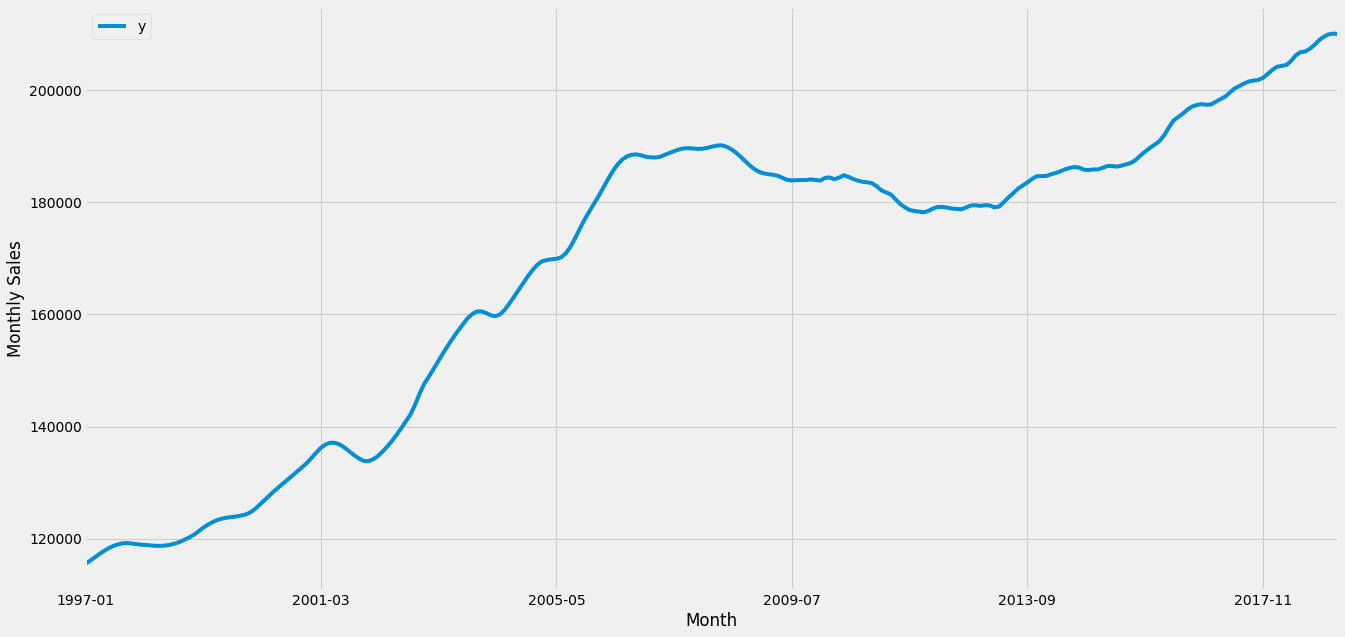

In [119]:
#This graph shows how the housing values present over the years.
ax = ARLR.set_index('ds').plot(figsize=(20, 10))
ax.set_ylabel('Monthly Sales')
ax.set_xlabel('Month')

plt.show()

In [120]:
#review data types
ARLR.dtypes

ds     object
y     float64
dtype: object

In [121]:
# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

bev_model = Prophet(interval_width=0.95)
bev_model.fit(ARLR)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [122]:
#set prediction periods to 13 months
future_dates = bev_model.make_future_dataframe(periods=13, freq='M')
future_dates.tail()

,ds
275,2019-11-30
276,2019-12-31
277,2020-01-31
278,2020-02-29
279,2020-03-31


In [123]:
# MODEL

forecast = bev_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
275,2019-11-30,214212.503330,210910.369533,217443.924021
276,2019-12-31,214877.903116,211330.122567,218487.499922
277,2020-01-31,215260.113521,211519.754905,219105.421104
278,2020-02-29,215548.435202,211214.733859,219247.852975
279,2020-03-31,216042.417693,211895.148975,220450.802764


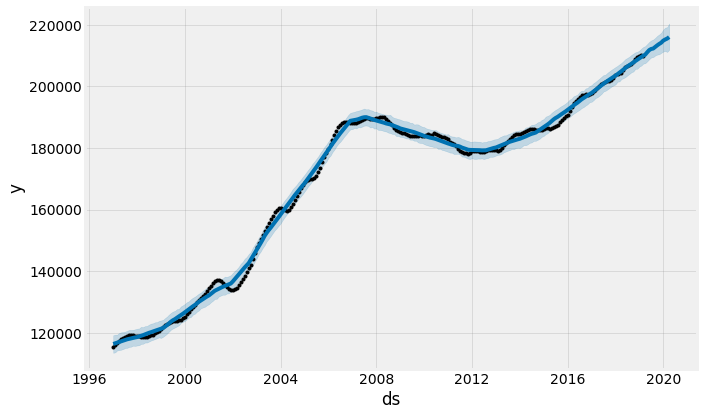

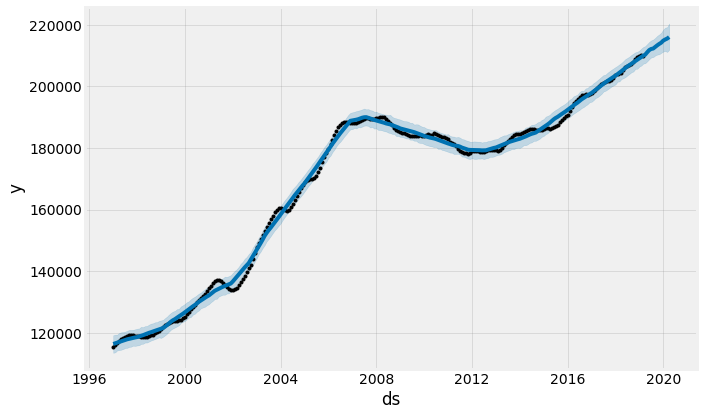

In [124]:
# MODEL
# the data trend and predition periods
bev_model.plot(forecast, uncertainty=True)

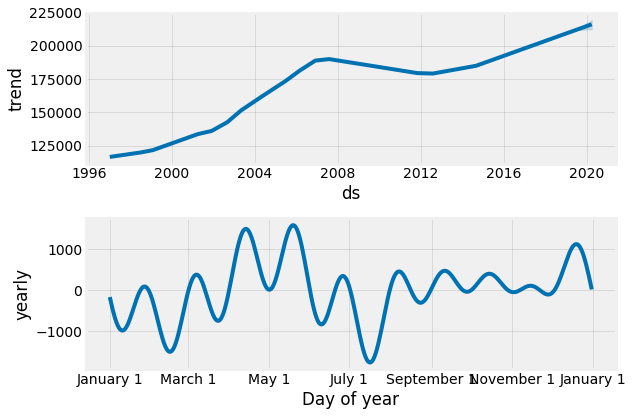

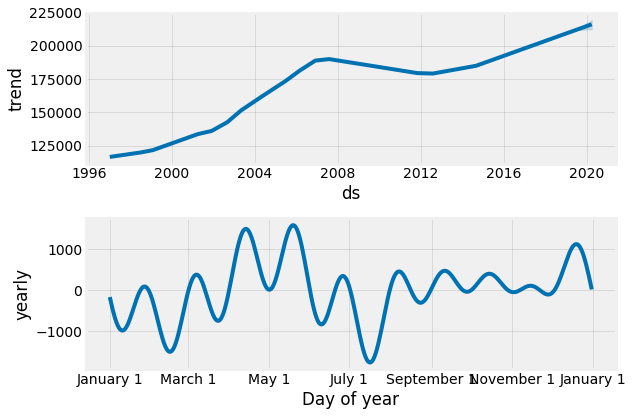

In [125]:
# The first graph shows how the trend for housing values over the years. 
# The second graph shows how the housing values differred in the same month but different years.
bev_model.plot_components(forecast)


In [126]:
#Locate the rows with City names Hot Springs; There's a city also named Hot Springs in state NC.
data.loc[data['City'] == 'Hot Springs']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
296,89249,71913,Hot Springs,AR,Las Vegas-Henderson-Paradise,Garland County,297,80900.0,80900.0,80800.0,80700.0,80600.0,80400.0,80200.0,79900.0,79600.0,79300.0,79100.0,78900.0,78900.0,79300.0,79900.0,80600.0,81500.0,82500.0,83400.0,84300.0,85300.0,86200.0,87100.0,87700.0,88300.0,88800.0,89100.0,89300.0,89300.0,89300.0,89100.0,88900.0,88700.0,...,138400,138900,139500,139900,140200,140400,140500,140700,141500,142300,142500,142700,143400,144000,143900,143800,144400,145300,145700,145700,146400,147300,147800,146700,145300,145000,145400,145000,144600,145100,146200,146700,146600,146700,147300,148600,150000,150800,151100,151300
2670,89244,71901,Hot Springs,AR,Las Vegas-Henderson-Paradise,Garland County,2671,67000.0,67000.0,67100.0,67100.0,67100.0,67000.0,67000.0,67000.0,67000.0,67000.0,67100.0,67100.0,67200.0,67300.0,67400.0,67500.0,67700.0,67900.0,68100.0,68300.0,68600.0,69000.0,69300.0,69600.0,69900.0,70200.0,70500.0,70700.0,71000.0,71200.0,71400.0,71500.0,71700.0,...,113800,113800,113400,113100,112800,112600,112600,113000,113700,114600,115000,115500,116600,117700,118200,119000,119900,121100,122100,122800,123400,124300,125200,125600,125500,125200,125300,125100,125100,125700,126400,126600,126700,127100,127900,128900,129800,130600,130900,130600
13452,70187,28743,Hot Springs,NC,Las Vegas-Henderson-Paradise,Madison County,13453,50200.0,51000.0,51900.0,52700.0,53600.0,54400.0,55200.0,56000.0,57000.0,58100.0,59000.0,59900.0,60800.0,61800.0,62800.0,63900.0,65000.0,66100.0,67200.0,68400.0,69800.0,71200.0,72500.0,73700.0,75000.0,76200.0,77400.0,78600.0,79700.0,80500.0,81300.0,82100.0,82900.0,...,148100,146500,145600,145300,144300,144800,147300,149400,149300,148400,148600,150000,151600,152700,154700,156800,157500,157800,158200,158100,159500,161200,158700,155700,157800,163000,166400,167700,169300,172300,174300,175200,177300,179900,181100,180600,181100,182200,182000,180400


In [0]:
#create a dataset containing City named Hot Springs and in state AR.
ARHS = data.loc[(data['City'] == 'Hot Springs') & (data['State'] == 'AR')]
#Averaging the values by month/year
ARHS = ARHS.groupby(['City','State'])['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'].mean()

In [128]:
#convert the dataset into verdical format
ARHS = pd.melt(ARHS, value_vars=['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'])

ARHS.head()

,variable,value
0,1997-01,73150.0
1,1997-02,73100.0
2,1997-03,73000.0
3,1997-04,73050.0
4,1997-05,73300.0


In [129]:
#rename the columns for Prophet
ARHS = ARHS.rename(index=str, columns={"value": "y", "variable": "ds"})
ARHS.head()

,ds,y
0,1997-01,73150.0
1,1997-02,73100.0
2,1997-03,73000.0
3,1997-04,73050.0
4,1997-05,73300.0


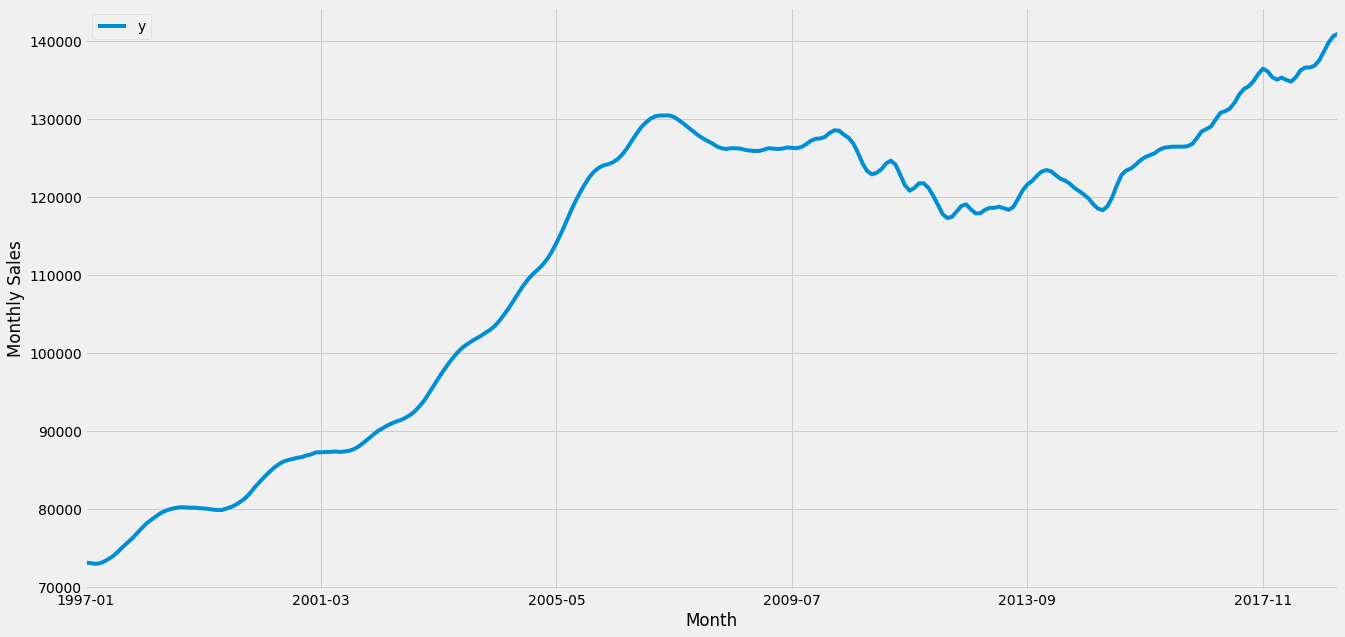

In [130]:
#This graph shows how the housing values present over the years.
ax = ARHS.set_index('ds').plot(figsize=(20, 10))
ax.set_ylabel('Monthly Sales')
ax.set_xlabel('Month')

plt.show()

In [131]:
# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

bev_model = Prophet(interval_width=0.95)
bev_model.fit(ARHS)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [132]:
#set prediction periods to 13 months
future_dates = bev_model.make_future_dataframe(periods=13, freq='M')
future_dates.tail()

,ds
275,2019-11-30
276,2019-12-31
277,2020-01-31
278,2020-02-29
279,2020-03-31


In [133]:
# MODEL

forecast = bev_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
275,2019-11-30,142899.898466,140066.004647,145279.225479
276,2019-12-31,142559.737628,140081.018787,145169.888679
277,2020-01-31,142109.224619,139134.447971,144783.454490
278,2020-02-29,144330.813467,141230.013214,147111.958617
279,2020-03-31,144478.308952,140758.414045,147527.912630


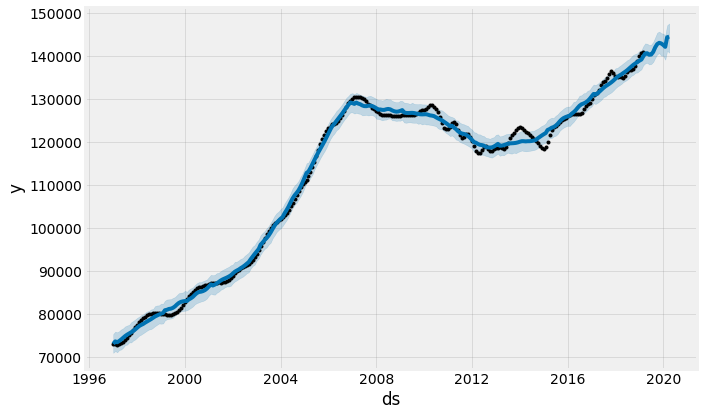

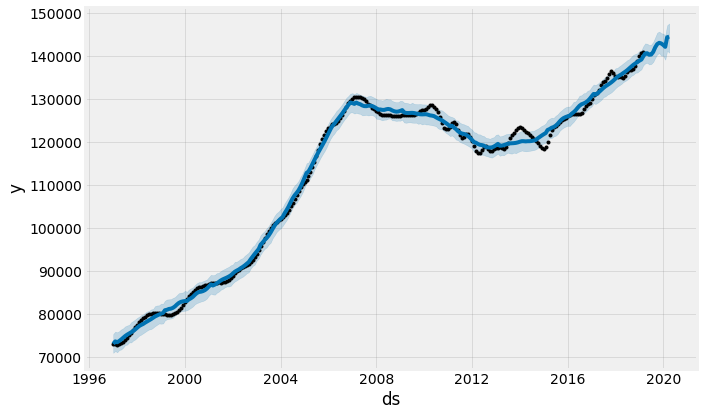

In [134]:
# MODEL
# the data trend and predition periods
bev_model.plot(forecast, uncertainty=True)

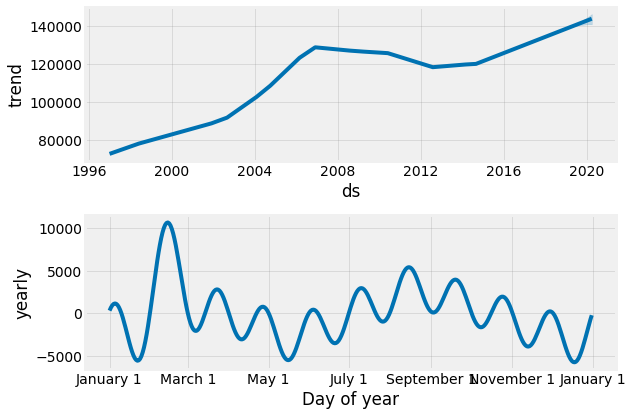

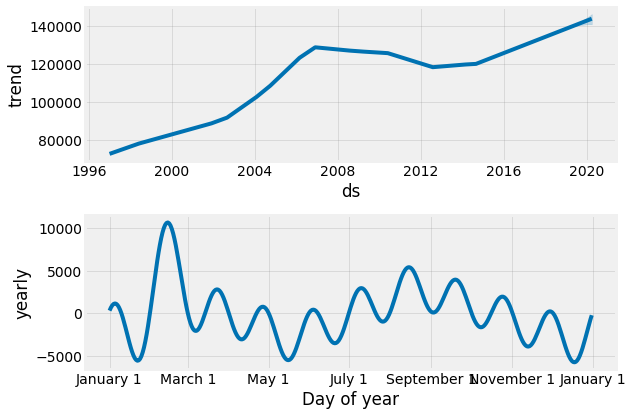

In [135]:
# The first graph shows how the trend for housing values over the years. 
# The second graph shows how the housing values differred in the same month but different years.

bev_model.plot_components(forecast)


In [136]:
#Locate the rows with City named Fayetteville; There are cities also named Fayetteville in other states.
data.loc[data['City'] == 'Fayetteville']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
187,69849,28314,Fayetteville,NC,Las Vegas-Henderson-Paradise,Cumberland County,188,83800.0,84100.0,84400.0,84800.0,85100.0,85400.0,85700.0,86000.0,86200.0,86400.0,86600.0,86700.0,86700.0,86700.0,86700.0,86600.0,86600.0,86600.0,86600.0,86700.0,86800.0,87000.0,87200.0,87400.0,87500.0,87600.0,87600.0,87600.0,87500.0,87300.0,87200.0,87200.0,87200.0,...,108900,109300,109800,110300,110100,109900,110300,111000,111300,111700,112300,112700,113200,113900,114700,115300,115600,115500,115500,115600,116100,116700,117000,116900,116500,116100,115800,116000,116100,116600,116900,117000,117200,117400,117500,117500,117800,118500,118000,116600
798,89707,72701,Fayetteville,AR,Las Vegas-Henderson-Paradise,Washington County,799,83100.0,83500.0,83700.0,83800.0,83700.0,83700.0,83700.0,83600.0,83600.0,83800.0,84400.0,85000.0,85500.0,85800.0,86000.0,86100.0,86100.0,86100.0,86100.0,86000.0,86000.0,86300.0,86800.0,87200.0,87400.0,87500.0,87400.0,87300.0,87200.0,87100.0,87300.0,87500.0,87800.0,...,175500,176900,178300,180300,182600,183900,184700,185700,187500,189300,190100,189700,189400,189500,190600,191900,192700,193400,194700,195700,196600,198200,200400,202500,205300,209300,212700,214400,215400,216600,217500,218700,220900,223000,225000,226800,228100,228800,228900,228300
1205,69842,28306,Fayetteville,NC,Las Vegas-Henderson-Paradise,Cumberland County,1206,81600.0,81800.0,82100.0,82500.0,82900.0,83300.0,83700.0,84100.0,84400.0,84800.0,85100.0,85500.0,85700.0,85900.0,86000.0,86100.0,86100.0,86200.0,86400.0,86600.0,87000.0,87500.0,88100.0,88800.0,89300.0,89600.0,89700.0,89700.0,89400.0,89100.0,88700.0,88300.0,87900.0,...,122700,122700,122900,123300,123500,123500,124100,125000,125500,125600,127100,129900,131500,131900,132600,133600,133800,133900,132400,129900,128700,129300,129800,130000,130500,131800,132900,133600,134000,134700,135500,136100,136200,137000,138000,138200,138400,139000,139900,140200
1394,69847,28311,Fayetteville,NC,Las Vegas-Henderson-Paradise,Cumberland County,1395,86700.0,87000.0,87200.0,87500.0,87800.0,88000.0,88100.0,88300.0,88400.0,88400.0,88300.0,88100.0,87800.0,87600.0,87300.0,87100.0,86900.0,86800.0,86900.0,87200.0,87500.0,88000.0,88500.0,89100.0,89600.0,90000.0,90400.0,90700.0,90900.0,91000.0,90900.0,90800.0,90700.0,...,111000,111500,112200,112900,113200,113800,115200,116600,117200,117400,118100,118900,119400,120100,121500,122500,122300,121200,120500,120300,120500,120400,119900,119500,119400,119500,119700,120300,121200,122000,122300,122000,121600,121800,122600,123100,123500,124200,124200,123400
1558,89709,72703,Fayetteville,AR,Las Vegas-Henderson-Paradise,Washington County,1559,104900.0,105300.0,105600.0,105800.0,106000.0,106200.0,106300.0,106400.0,106600.0,107100.0,107500.0,107800.0,108100.0,108300.0,108400.0,108300.0,108100.0,107700.0,107200.0,106700.0,106100.0,105600.0,105100.0,104400.0,103600.0,102900.0,102300.0,101800.0,101400.0,101300.0,101500.0,101800.0,102400.0,...,191200,193000,195400,198100,199800,200100,200100,200600,202100,203400,204400,205600,207200,208700,210500,212300,214500,217700,220000,220400,220800,222200,223300,223800,224000,224700,225500,226600,228200,229600,231000,232400,233100,233700,235300,237300,239000,240000,240000,239400
1612,69840,28304,Fayetteville,NC,Las Vegas-Henderson-Paradise,Cumberland County,1613,73300.0,73400.0,73400.0,73500.0,73600.0,73600.0,73700.0,73700.0,73800.0,738

In [0]:
#create a dataset containing City named Fayetteville and in state AR.
ARFY = data.loc[(data['City'] == 'Fayetteville') & (data['State'] == 'AR')]
#Averaging the values by month/year
ARFY = ARFY.groupby(['City','State'])['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'].mean()

In [138]:
#convert the dataset into verdical format
ARFY = pd.melt(ARFY, value_vars=['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'])

ARFY.head()

,variable,value
0,1997-01,92966.666667
1,1997-02,93466.666667
2,1997-03,93866.666667
3,1997-04,94233.333333
4,1997-05,94366.666667


In [139]:
# rename the columns for Prophet
ARFY = ARFY.rename(index=str, columns={"value": "y", "variable": "ds"})
ARFY.head()

,ds,y
0,1997-01,92966.666667
1,1997-02,93466.666667
2,1997-03,93866.666667
3,1997-04,94233.333333
4,1997-05,94366.666667


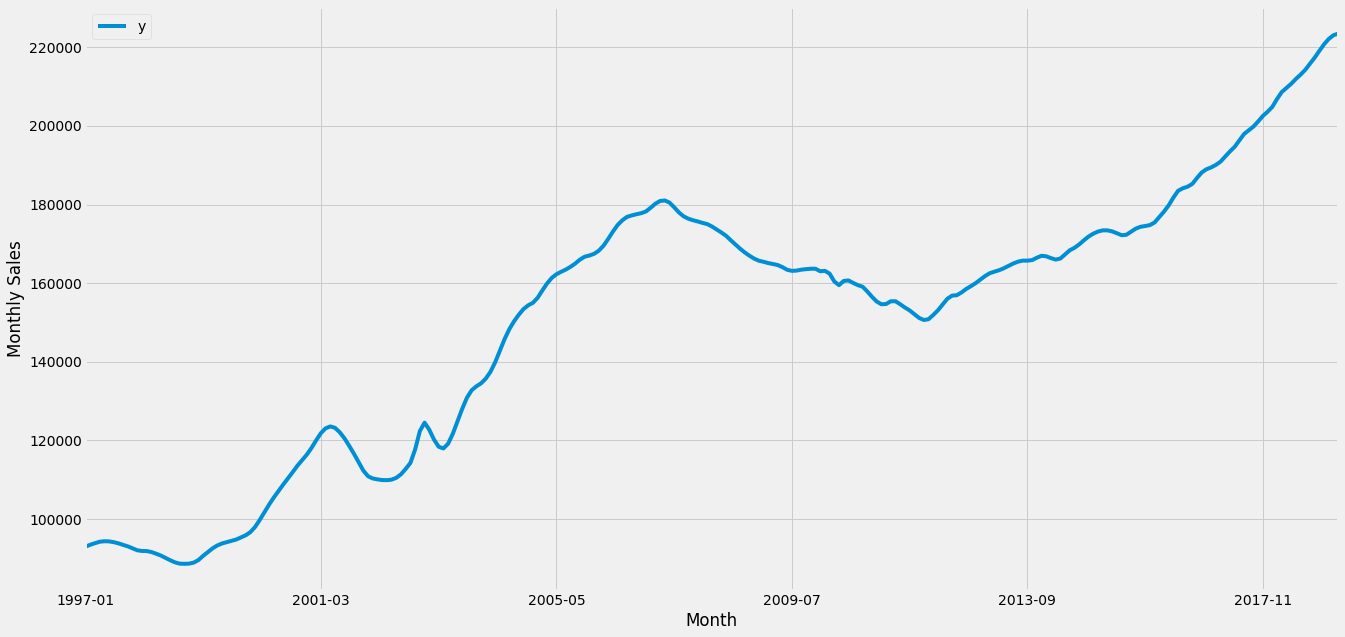

In [140]:
#This graph shows how the housing values present over the years.
ax = ARFY.set_index('ds').plot(figsize=(20, 10))
ax.set_ylabel('Monthly Sales')
ax.set_xlabel('Month')

plt.show()

In [141]:
# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

bev_model = Prophet(interval_width=0.95)
bev_model.fit(ARFY)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [142]:
#set prediction periods to 13 months
future_dates = bev_model.make_future_dataframe(periods=13, freq='M')
future_dates.tail()

,ds
275,2019-11-30
276,2019-12-31
277,2020-01-31
278,2020-02-29
279,2020-03-31


In [143]:
# MODEL
# the data trend and predition periods
forecast = bev_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
275,2019-11-30,226299.767263,219752.264722,232320.594814
276,2019-12-31,226679.324592,219663.860045,233602.086119
277,2020-01-31,226886.583346,219983.088173,234235.827657
278,2020-02-29,231634.040119,223560.745272,239691.159885
279,2020-03-31,230736.751092,222882.075618,239260.333674


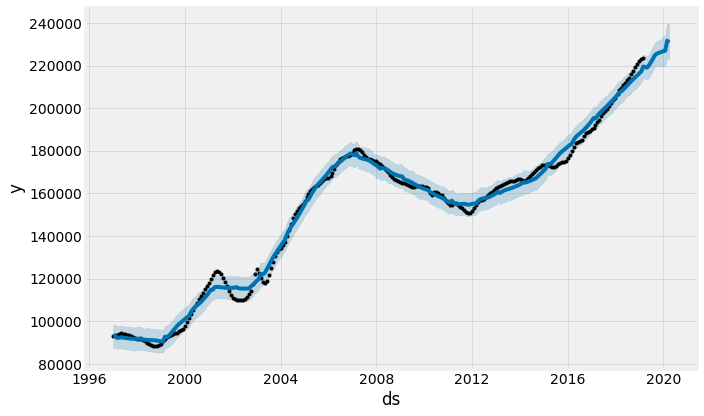

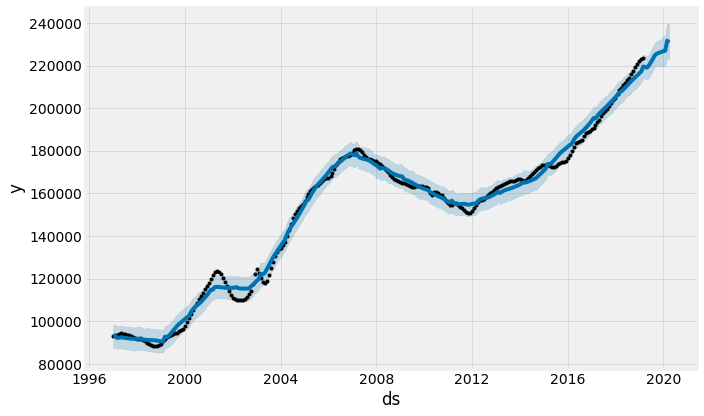

In [144]:
# MODEL
#This graph shows how the housing values present over the years.
bev_model.plot(forecast, uncertainty=True)

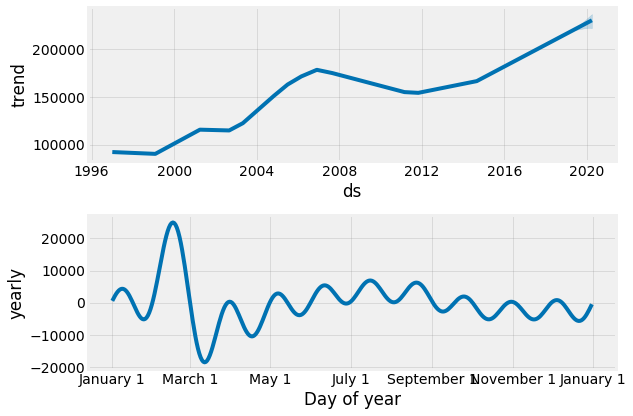

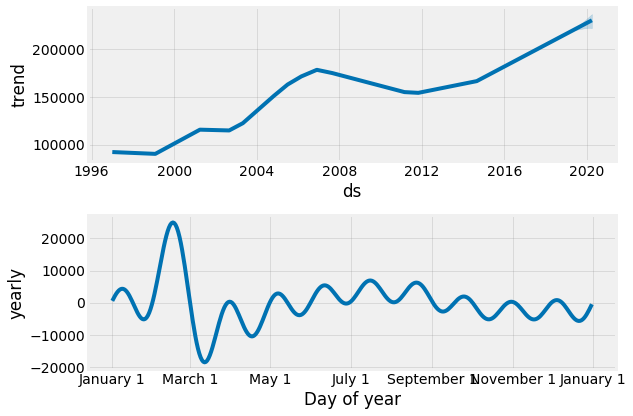

In [145]:
# The first graph shows how the trend for housing values over the years. 
# The second graph shows how the housing values differred in the same month but different years.

bev_model.plot_components(forecast)


In [146]:
#locate rows with city named Searcy
data.loc[data['City'] == 'Searcy']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
2272,89409,72143,Searcy,AR,Las Vegas-Henderson-Paradise,White County,2273,73800.0,74100.0,74300.0,74600.0,74800.0,75100.0,75400.0,75700.0,76000.0,76400.0,76700.0,77000.0,77300.0,77500.0,77700.0,77800.0,77900.0,78000.0,78100.0,78200.0,78400.0,78700.0,79100.0,79500.0,80100.0,80600.0,81200.0,81700.0,82300.0,82700.0,83000.0,83400.0,83600.0,...,115800,116400,117200,117800,118100,118700,120000,121200,121700,121600,121400,121400,122100,122700,122800,122500,122300,121900,121600,121900,122300,122300,122200,122700,123700,124500,125100,125400,125500,125400,125200,124700,124900,126300,128400,129700,130200,130600,131700,132600


In [0]:
#create a dataset containing on only rows from Searcy
ARSR = data.loc[(data['City'] == 'Searcy') & (data['State'] == 'AR')]
#averaging the values by month/year
ARSR = ARSR.groupby(['City','State'])['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'].mean()

In [148]:
#convert the dataset into vertical layout
ARSR = pd.melt(ARSR, value_vars=['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'])

ARSR.head()

,variable,value
0,1997-01,76400.0
1,1997-02,76700.0
2,1997-03,77000.0
3,1997-04,77300.0
4,1997-05,77500.0


In [149]:
#update the column names to run Prophet
ARSR = ARSR.rename(index=str, columns={"value": "y", "variable": "ds"})
ARSR.head()

,ds,y
0,1997-01,76400.0
1,1997-02,76700.0
2,1997-03,77000.0
3,1997-04,77300.0
4,1997-05,77500.0


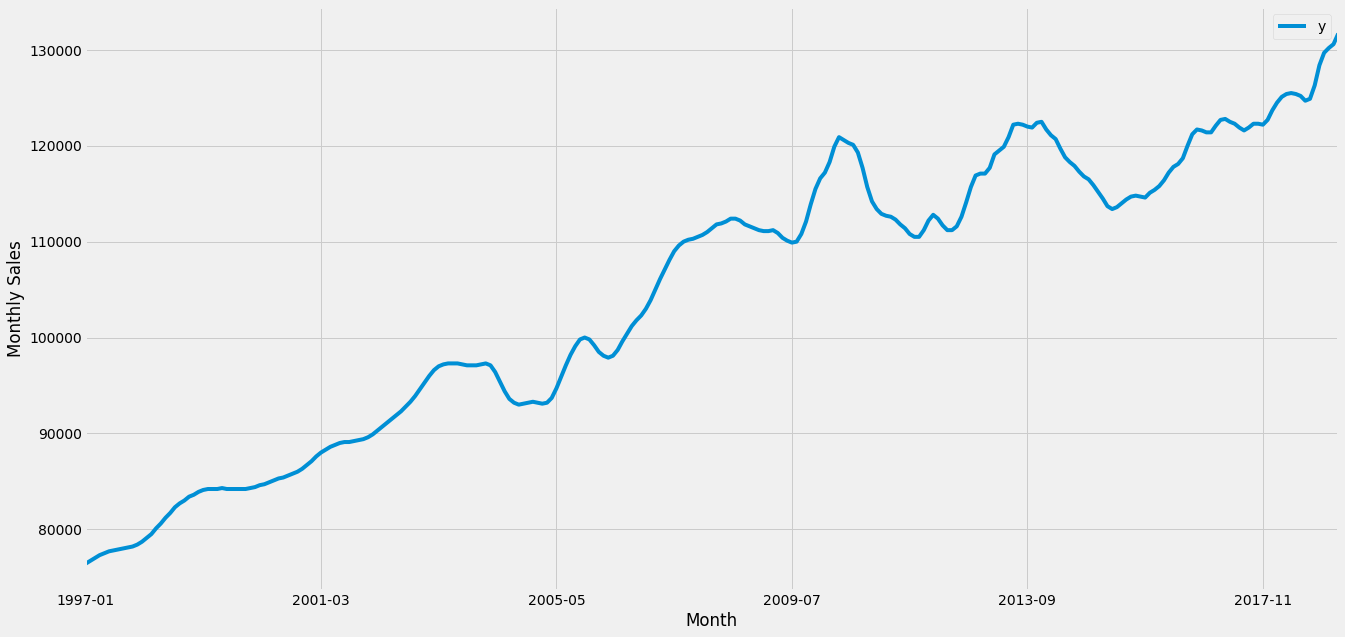

In [150]:
#This graph shows how the housing values present over the years.
ax = ARSR.set_index('ds').plot(figsize=(20, 10))
ax.set_ylabel('Monthly Sales')
ax.set_xlabel('Month')

plt.show()

In [151]:
# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

bev_model = Prophet(interval_width=0.95)
bev_model.fit(ARSR)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [152]:
#set prediction periods to 13 months
future_dates = bev_model.make_future_dataframe(periods=13, freq='M')
future_dates.tail()

,ds
275,2019-11-30
276,2019-12-31
277,2020-01-31
278,2020-02-29
279,2020-03-31


In [153]:
# MODEL

forecast = bev_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
275,2019-11-30,128318.136833,123503.166429,133387.148690
276,2019-12-31,128172.268090,123138.077201,133397.776689
277,2020-01-31,127167.250501,121832.977026,132262.097692
278,2020-02-29,129064.552618,123883.566291,134547.528538
279,2020-03-31,128359.360945,123299.709193,133996.955947


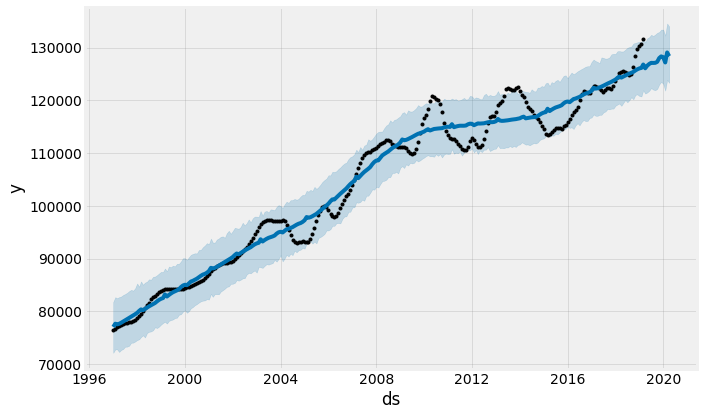

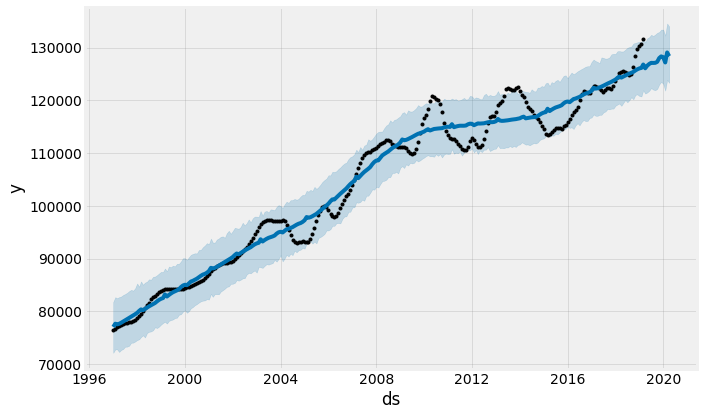

In [154]:
# MODEL
# the data trend and predition periods
bev_model.plot(forecast, uncertainty=True)

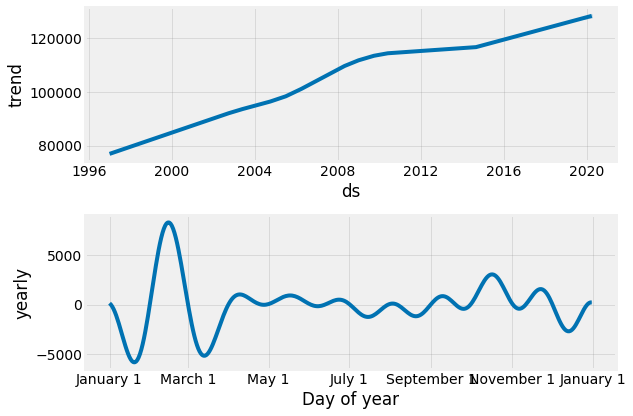

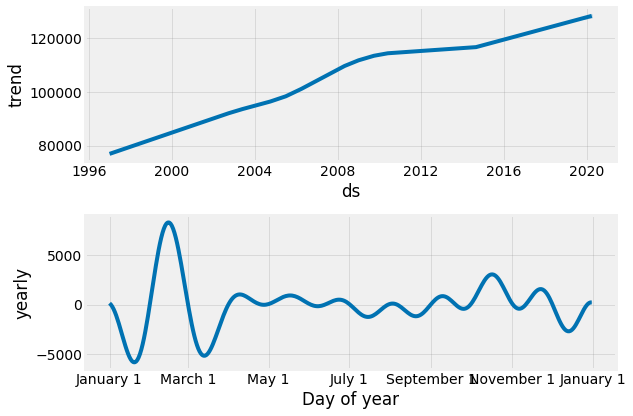

In [155]:
# The first graph shows how the trend for housing values over the years. 
# The second graph shows how the housing values differred in the same month but different years.

bev_model.plot_components(forecast)

In [156]:
#Merging datasets to include housing values from each city to prepare the graph
AR = ARLR.merge(ARHS, 
                        left_on='ds', 
                        right_on='ds', 
                        how='inner', 
                        suffixes=["","_2"] #since they are the same name, we need a suffix
                       )

AR = AR.merge(ARFY, 
                        left_on='ds', 
                        right_on='ds', 
                        how='inner', 
                        suffixes=["","_3"] #since they are the same name, we need a suffix
                       )

AR = AR.merge(ARSR, 
                        left_on='ds', 
                        right_on='ds', 
                        how='inner', 
                        suffixes=["","_4"] #since they are the same name, we need a suffix
                       )

AR.head()

,ds,y,y_2,y_3,y_4
0,1997-01,115537.5,73150.0,92966.666667,76400.0
1,1997-02,116087.5,73100.0,93466.666667,76700.0
2,1997-03,116687.5,73000.0,93866.666667,77000.0
3,1997-04,117300.0,73050.0,94233.333333,77300.0
4,1997-05,117850.0,73300.0,94366.666667,77500.0


In [157]:
#rename the column names
AR = AR.rename(index=str, columns={"y": "Little Rock", "y_2": "Hot Springs", "y_3": "Fayetteville", "y_4": "Searcy"})
AR.head()

,ds,Little Rock,Hot Springs,Fayetteville,Searcy
0,1997-01,115537.5,73150.0,92966.666667,76400.0
1,1997-02,116087.5,73100.0,93466.666667,76700.0
2,1997-03,116687.5,73000.0,93866.666667,77000.0
3,1997-04,117300.0,73050.0,94233.333333,77300.0
4,1997-05,117850.0,73300.0,94366.666667,77500.0


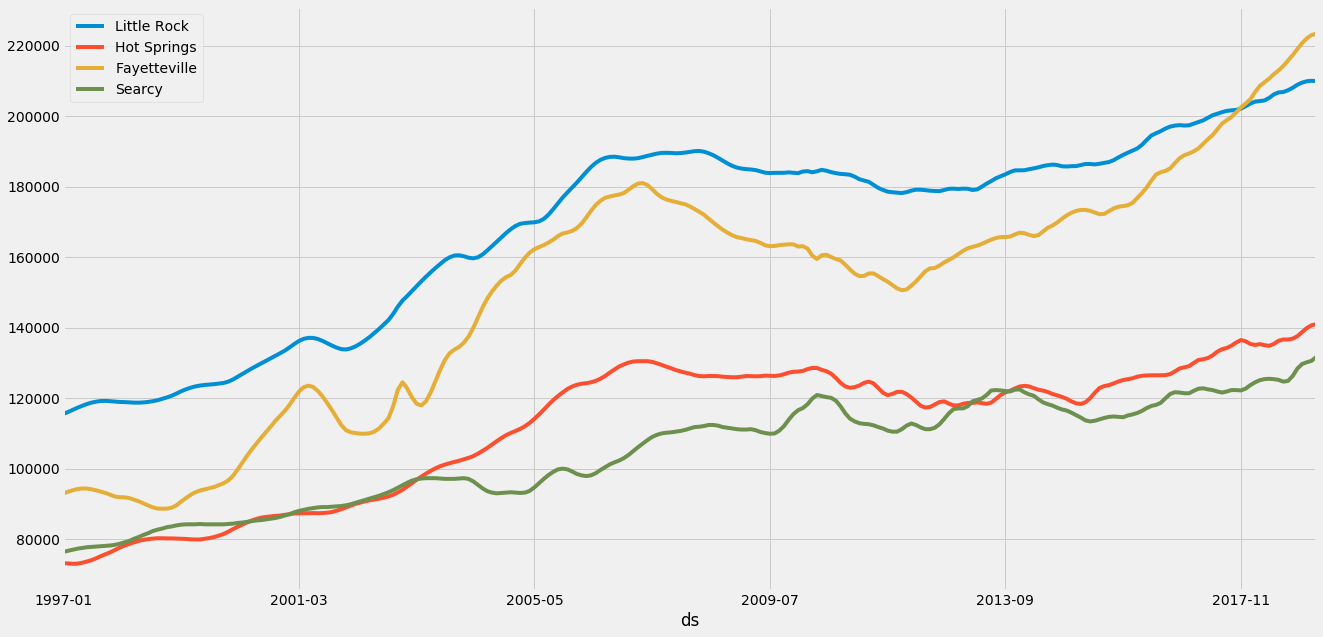

In [158]:
#plot the graph to include all four cities.
AR.set_index('ds').plot(figsize=(20,10), grid=True)

In [0]:
#prepare data to run prediction models for all the zip codes
CZIP = data.copy()
#averaging values by region names/zip codes
CZIP = CZIP.groupby(['RegionName'])['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12'].mean()

In [160]:
#preview the data
CZIP.head()

,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,...,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
RegionName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,111900.0,112300.0,112500.0,112800.0,113100.0,113300.0,113600.0,113800.0,114100.0,114300.0,114600.0,114900.0,115300.0,115700.0,116000.0,116200.0,116400.0,116500.0,116700.0,116800.0,117000.0,117100.0,117300.0,117500.0,117900.0,118300.0,118700.0,119100.0,119500.0,119900.0,120300.0,120700.0,121200.0,121600.0,122000.0,122600.0,123200.0,123800.0,124400.0,124900.0,...,186800.0,187400.0,188100.0,189100.0,190100.0,191200.0,192100.0,192900.0,193000.0,192700.0,192000,191500,191700,192900,194100,195000,195700,196200,196200,196400,197300,198000,199200,200900,202000,202200,202500,202500,202600,203800,205900,208300,210500,212500,214100,216100,218700,220600,221600,222200
1002,157600.0,158400.0,159100.0,159800.0,160500.0,161200.0,161800.0,162300.0,162900.0,163500.0,164100.0,164700.0,165300.0,166000.0,166400.0,166700.0,166800.0,166800.0,166700.0,166400.0,166200.0,166000.0,165800.0,165800.0,165900.0,166200.0,166500.0,166800.0,167100.0,167500.0,168000.0,168500.0,169200.0,170000.0,170800.0,171900.0,173100.0,174400.0,175600.0,176700.0,...,313600.0,315700.0,318500.0,321000.0,321500.0,321200.0,321600.0,322100.0,321600.0,319600.0,316500,314500,314500,314900,315200,315200,315000,314800,315200,314600,313000,312800,315400,317900,319100,319700,320600,321900,323600,325900,328500,330400,331900,333300,334300,335400,337700,340100,341700,343400
1005,105500.0,105800.0,106000.0,106200.0,106400.0,106700.0,106900.0,107100.0,107300.0,107600.0,107800.0,108300.0,108800.0,109300.0,109700.0,110100.0,110600.0,111000.0,111500.0,111900.0,112400.0,112900.0,113500.0,114300.0,115200.0,116100.0,117000.0,117900.0,118800.0,119800.0,120800.0,121800.0,122800.0,123800.0,125000.0,126300.0,127600.0,129000.0,130300.0,131600.0,...,179400.0,179300.0,179200.0,179400.0,179300.0,178200.0,176900.0,176100.0,176200.0,176600.0,176200,176100,176800,177200,177400,178500,180500,182200,183800,185900,188300,190000,191700,193200,195500,199200,203400,205800,206500,206900,207100,206200,205900,206300,206300,207300,209100,210500,211300,213100
1007,130800.0,131500.0,132200.0,132900.0,133600.0,134100.0,134500.0,134800.0,135000.0,135100.0,135200.0,135400.0,135700.0,136100.0,136400.0,136700.0,136900.0,137100.0,137200.0,137200.0,137100.0,137100.0,137100.0,137100.0,137400.0,137800.0,138100.0,138600.0,139100.0,139600.0,140100.0,140700.0,141400.0,142200.0,143100.0,144200.0,145600.0,147200.0,148800.0,150400.0,...,247500.0,248300.0,249500.0,250000.0,248600.0,246500.0,245700.0,245500.0,245600.0,246100.0,246800,247300,248200,249100,249300,250000,251000,252200,253900,255400,256000,256900,258100,258800,259500,260400,261000,261800,263200,264900,267000,268400,268600,267700,267200,267200,267700,268300,268900,268900
1008,115800.0,116000.0,116100.0,116200.0,116300.0,116400.0,116500.0,116700.0,116900.0,117000.0,117200.0,117300.0,117500.0,117700.0,117800.0,117900.0,117900.0,118000.0,118100.0,118200.0,118300.0,118400.0,118400.0,118400.0,118500.0,118600.0,118700.0,118700.0,118800.0,118900.0,119100.0,119400.0,119600.0,120000.0,120400.0,120700.0,121200.0,121800.0,122400.0,122900.0,...,187200.0,186300.0,186000.0,185700.0,186800.0,188700.0,190500.0,191100.0,191500.0,191800.0,193100,195000,195800,195700,196900,198400,198600,198800,198900,199300,201000,202700,203900,204700,205500,207000,208400,209200,20

In [0]:
# get a list of all the column names 
RegionName = CZIP.index.values
RegionName = list(RegionName)

In [0]:
#run each zip code and historical data with Prophet modeling. Write the results into each list.
ZIP=[]
D20171201=[]
D20171231=[]
D20180131=[]
D20180228=[]
D20180331=[]
D20180430=[]
D20180531=[]
D20180630=[]
D20180731=[]
D20180831=[]
D20180930=[]
D20181031=[]
D20181130=[]
D20181231=[]
EXPECTED=[]
for i in RegionName:
  ZIP.append(i)
  i = CZIP.loc[[i]]
  i = pd.melt(i, value_vars=['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12'])

  i = i.rename(index=str, columns={"variable": "ds", "value": "y"})
  bev_model = Prophet(interval_width=0.95)
  bev_model.fit(i)
  future_dates = bev_model.make_future_dataframe(periods=13, freq='M')
  forecast = bev_model.predict(future_dates)
  D20171201.append(forecast.iloc[-14][-1])
  D20171231.append(forecast.iloc[-13][-1])
  D20180131.append(forecast.iloc[-12][-1])
  D20180228.append(forecast.iloc[-11][-1])
  D20180331.append(forecast.iloc[-10][-1])
  D20180430.append(forecast.iloc[-9][-1])
  D20180531.append(forecast.iloc[-8][-1])
  D20180630.append(forecast.iloc[-7][-1])
  D20180731.append(forecast.iloc[-6][-1])
  D20180831.append(forecast.iloc[-5][-1])
  D20180930.append(forecast.iloc[-4][-1])
  D20181031.append(forecast.iloc[-3][-1])
  D20181130.append(forecast.iloc[-2][-1])
  D20181231.append(forecast.iloc[-1][-1])
  EXPECTED.append((forecast.iloc[-1][-1]/forecast.iloc[-13][-1])-1)

In [0]:
#rename the column names
cdata = {"Zip Code":ZIP,"Price on 20171201":D20171201,"Price on 20171231":D20171231,"Price on 20180131":D20180131,"Price on 20180228":D20180228,"Price on 20180331":D20180331,"Price on 20180430":D20180430,"Price on 20180531":D20180531,"Price on 20180630":D20180630,"Price on 20180731":D20180731,"Price on 20180831":D20180831,"Price on 20180930":D20180930,"Price on 20181031":D20181031,"Price on 20181130":D20181130,"Price on 20181231":D20181231,"Expected Increase":EXPECTED}
#create the file
df = pd.DataFrame(data = cdata)
df.to_csv("Forecast.csv", header=True, index=False)

In [164]:
#read the output file
df = pd.read_csv('Forecast.csv', sep=',', error_bad_lines=False, encoding = "ISO-8859-1")
df.head(5)

,Zip Code,Price on 20171201,Price on 20171231,Price on 20180131,Price on 20180228,Price on 20180331,Price on 20180430,Price on 20180531,Price on 20180630,Price on 20180731,Price on 20180831,Price on 20180930,Price on 20181031,Price on 20181130,Price on 20181231,Expected Increase
0,1001,213285.121718,213693.175354,213626.773031,215157.927317,215654.347950,216008.061846,216749.665840,217485.281861,218242.117367,219006.831929,219518.128323,220214.109073,220948.811965,221314.780338,0.035666
1,1002,335609.422299,336189.139265,335827.459465,337324.144668,338080.409679,339298.387795,339714.271055,339493.340516,340056.277807,341416.904594,342488.540441,343419.259985,344039.290220,344540.263351,0.024841
2,1005,210831.720447,210138.865106,210285.096906,217539.622729,215941.112981,214695.443849,214753.718798,215530.328607,217724.116546,220371.224498,221861.177339,222000.066879,221597.973440,221247.535738,0.052863
3,1007,268809.311759,268917.578497,269154.627291,272270.182179,271407.132884,271676.476370,272400.371255,273097.725036,273892.939539,274886.509776,275340.091205,275851.815693,276064.483018,276235.254461,0.027212
4,1008,207205.019546,206344.046342,205996.392018,212379.259449,209674.329356,207787.700549,207749.746795,209089.175529,210957.799627,211807.354747,211635.921102,211726.880644,211679.633833,210528.965559,0.020281


In [165]:
#sort the expect profit in Expected Increase column
df_sort = df.sort_values('Expected Increase',ascending=False)
df_sort.head(5)

,Zip Code,Price on 20171201,Price on 20171231,Price on 20180131,Price on 20180228,Price on 20180331,Price on 20180430,Price on 20180531,Price on 20180630,Price on 20180731,Price on 20180831,Price on 20180930,Price on 20181031,Price on 20181130,Price on 20181231,Expected Increase
4444,33603,183912.648305,185344.244676,187793.158255,191655.575393,192429.984179,194202.929831,196613.935224,199347.920574,202008.758747,204368.496677,206448.350146,208679.265291,210808.013271,212272.412159,0.145287
4738,34982,147236.449922,148021.616519,149908.850349,153598.401161,154018.150085,155025.420908,156848.703593,158773.117401,160896.140258,163368.296089,165012.451061,166336.481493,167444.459629,168442.704243,0.137960
1146,15201,173974.995369,176252.956386,179533.733826,179101.176413,181135.700636,183688.006635,186701.406912,189210.420454,190615.558339,191909.143611,193716.888683,195941.563222,198317.023542,200566.466565,0.137947
5026,37210,202716.785930,203436.950916,205362.058382,211266.598300,211248.916906,212989.848650,215475.003962,218077.946666,220764.006345,223444.918335,226070.868003,228456.104512,229547.180210,230600.804159,0.133525
4588,34207,150699.387990,151023.608465,152096.801853,158285.578886,157500.731549,157768.351244,159514.343878,162083.561975,164575.857683,166787.164483,168270.418241,169636.318492,170729.074131,171001.201249,0.132281


# Questions

What technique/algorithm/decision process did you use to down sample? (BONUS FOR
NOT DOWN SAMPLING)

I used prophet withour downsampling

What three zip codes provide the best investment opportunity for the SREIT?

A: 33603, 34982, 15201

Why?

A: The expected profit comparing 20181231 house values and 20171231 for those three zip codes is the highest.

# Bonus

In [0]:
#prepare the data set to plot the US map
data_state = data.copy()

In [167]:
#review data
data_state.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
0,84654,60657,Chicago,IL,Las Vegas-Henderson-Paradise,Cook County,1,337200.0,338200.0,339000.0,339700.0,340400.0,341000.0,341600.0,342300.0,343400.0,344900.0,346200.0,347000.0,347900.0,349100.0,350400.0,352000.0,353800.0,356100.0,358700.0,361600.0,365400.0,370000.0,374400.0,378700.0,383300.0,388100.0,393100.0,398300.0,403600.0,409000.0,414500.0,420000.0,426100.0,...,952800,959300,966100,968600,971300,972400,970200,971800,978400,986200,993700,998300,997100,994300,991300,987900,989500,997900,1005100,1008300,1009600,1012200,1016500,1022600,1029000,1034500,1036700,1036600,1038800,1040900,1041900,1044100,1047700,1049600,1048500,1048500,1052700,1057800,1067100,1076100
1,91982,77494,Katy,TX,Las Vegas-Henderson-Paradise,Harris County,2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,...,327400,326900,327300,328900,329900,329800,328700,327400,326400,325500,324800,324800,323800,322200,320900,320400,320200,320700,320700,320100,319900,320400,320900,321100,322800,326600,330400,332600,334400,335700,336800,338100,338500,337200,336200,336100,335300,334000,333400,333200
2,84616,60614,Chicago,IL,Las Vegas-Henderson-Paradise,Cook County,3,502900.0,504900.0,506300.0,507200.0,507400.0,507000.0,506100.0,504700.0,503700.0,503200.0,501900.0,499500.0,497500.0,495900.0,494800.0,494400.0,494800.0,496000.0,498400.0,501900.0,507600.0,514700.0,522100.0,529400.0,537900.0,547000.0,556500.0,566100.0,575700.0,584800.0,593500.0,601600.0,610100.0,...,1230200,1234900,1240100,1243300,1244100,1244400,1243400,1243400,1245500,1251600,1259900,1266900,1271800,1275900,1279000,1280800,1284100,1288000,1290100,1289300,1290400,1295700,1301700,1304500,1309700,1314900,1317300,1319400,1322700,1321600,1320100,1320200,1319100,1318200,1319600,1322700,1328100,1334600,1340900,1342900
3,91940,77449,Katy,TX,Las Vegas-Henderson-Paradise,Harris County,4,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,96800.0,96700.0,96600.0,96400.0,96200.0,96100.0,96200.0,96300.0,96600.0,97000.0,97500.0,98000.0,98400.0,98800.0,99200.0,99500.0,99700.0,100000.0,100200.0,100400.0,100700.0,101100.0,101800.0,102900.0,104300.0,106200.0,...,156000,157700,159400,161600,164100,166100,167400,168200,168500,168600,168600,168500,168200,167700,167200,166900,166900,166800,166800,167400,168400,169700,170900,172200,173400,174300,175200,176300,176800,176900,177400,178100,178700,179600,180300,180900,181900,183200,182900,181500
4,93144,79936,El Paso,TX,Las Vegas-Henderson-Paradise,El Paso County,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,...,116100,115600,115000,114600,114200,114100,114100,113900,114100,114800,115700,116200,116800,117300,117700,118100,118700,119000,119200,119500,119900,120300,120300,120200,120200,120400,120600,121200,122200,123000,123700,124600,125700,126400,126800,127500,128100,128600,128800,128800


In [0]:
#include only state and 2018-12 column
data_state = data_state[['State','2018-12']]

In [169]:
#review data
data_state.head()

,State,2018-12
0,IL,1048500
1,TX,336100
2,IL,1322700
3,TX,180900
4,TX,127500


In [0]:
#averaging values by states
data_state = data_state.groupby(['State']).mean()
#round up the values to 2 decimals
data_state = data_state.round(2)

In [0]:
#reset the index to sequential indexing
data_state = data_state.reset_index()

In [172]:
#review data
data_state.head()

,State,2018-12
0,AK,332695.45
1,AL,158953.63
2,AR,146804.26
3,AZ,291761.21
4,CA,776245.43


In [173]:
#review data type
data_state.dtypes

State       object
2018-12    float64
dtype: object

In [174]:
#plot the map
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

for col in data_state.columns:
    data_state[col] = data_state[col].astype(str)

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

data_state['text'] = data_state['State'] + '<br>' + data_state['2018-12']

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = data_state['State'],
    z = data_state['2018-12'].astype(float),
    locationmode = 'USA-states',
    text = data_state['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "USD")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = '2018 Dec Housing Value by State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')